<a href="https://colab.research.google.com/github/1nakatan/modern-control/blob/master/%E6%A5%B5%E9%85%8D%E7%BD%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#python-control で制御系のシミュレーション！
!pip install slycot
!pip install control

     |████████████████████████████████| 1.5MB 5.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.3.5-cp36-cp36m-linux_x86_64.whl size=1388760 sha256=fd89c7113854954de1600660396d939b9c92a06dd61d4a0c019d856c1f0c4766
  Stored in directory: /root/.cache/pip/wheels/44/a0/1a/2357a505e49314f194d8de50d5ce0a87b368b323ce70b34d16
Successfully built slycot
     |████████████████████████████████| 184kB 5.0MB/s 
  Created wheel for control: filename=control-0.8.2-py2.py3-none-any.whl size=192241 sha256=f953f8ad7ef1136627db1d9b8c14b40b95bd01a637e556e91ae4b942761e6170
  Stored in directory: /root/.cache/pip/wheels/62/70/b3/4ff8c0348172e6b1fa8c9c2f1388e80d3e86f15f27d63c2e23
Successfully built control


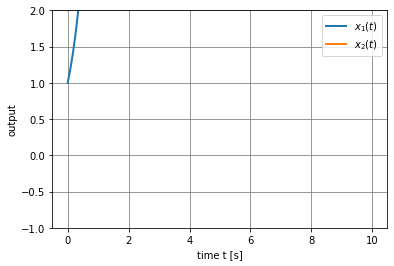

In [10]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#システムの定義
A = [[0, 1],[-2, 3]]
b = [[0],[1]]
c = [[1, 0],[0,1]]  #状態を出力するために単位行列を利用
d = [[0],[0]]       #状態を出力するため

#初期値
x0 = [[1],[1]]

#ステップ応答を評価
sys = ss(A, b, c, d)    #状態空間表現
t = np.arange(0,10,0.01) #時刻0から10s まで　0.01 s 刻み
y,T = impulse(sys,t,x0)

#表示
plt.plot(T,y[:,0],label='$x_1(t)$', lw=2)  #x1
plt.plot(T,y[:,1],label='$x_2(t)$', lw=2)  #x2
plt.grid(color='gray')
plt.xlabel('time t [s]')
plt.ylabel('output')
plt.ylim([-1, 2])
plt.legend()
plt.show()

ゲイン: [[4. 8.]]
固有値: [-2. -3.]


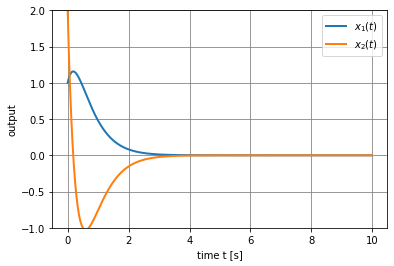

In [17]:
#極配置
K=place(A, b, [-2, -3])

print("ゲイン:",K)
print("固有値:",np.linalg.eig(A-b*K)[0])
#ステップ応答を評価
sys = ss(A-b*K, b, c, d) #状態空間表現
t = np.arange(0,10,0.01) #時刻0から10s まで　0.01 s 刻み
y,T = impulse(sys,t,x0)

#表示
plt.plot(T,y[:,0],label='$x_1(t)$', lw=2)  #x1
plt.plot(T,y[:,1],label='$x_2(t)$', lw=2)  #x2
plt.grid(color='gray')
plt.xlabel('time t [s]')
plt.ylabel('output')
plt.ylim([-1, 2])
plt.legend()
plt.show()